In [2]:
%matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

import numpy as np
import importlib
import integralclient as ic
importlib.reload(ic)
ic.__file__

from collections import defaultdict
import glob
from astropy.wcs import WCS

import astropy.io.fits as fits
from astropy import units as u
from astropy import constants as const

import importlib
import integralclient as ic
import numpy as np

import hashlib

hashstring = lambda x:hashlib.sha224(x.encode()).hexdigest()[:8]


import matplotlib.font_manager as font_manager

selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/
failed to import oda


In [11]:
import ddaclient

In [12]:
import yaml

bursts = yaml.load(open("draft/PAPER_SGR1935_INTEGRAL/data/burst-search/bursts.yaml"))

#for b in bursts[]

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

sgr1935_distance = 9.1*u.kpc

for b


<IPython.core.display.Javascript object>


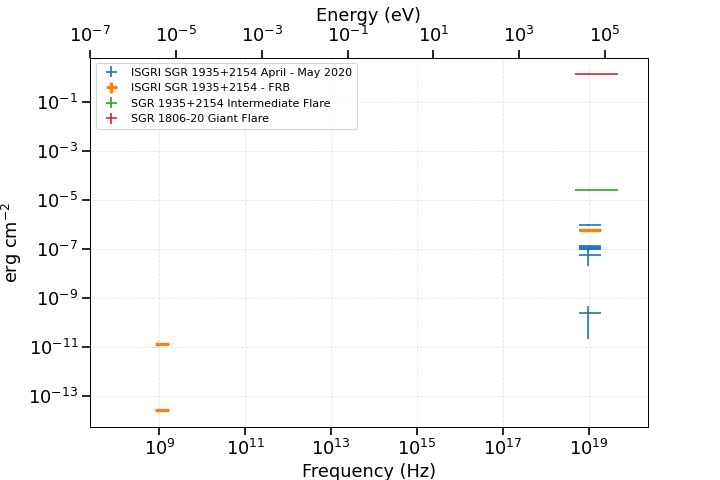

[1.16911075e-07 9.17493063e-08 1.42072844e-07] erg / cm2
[1.02561908e-07 7.36720779e-08 1.31451739e-07] erg / cm2
[1.26799722e-07 1.09797205e-07 1.43802239e-07] erg / cm2
[9.74660920e-08 8.12139167e-08 1.13718267e-07] erg / cm2
[5.87584347e-08 1.98440546e-08 9.76728147e-08] erg / cm2
[1.18422882e-07 8.84907308e-08 1.48355033e-07] erg / cm2
[5.85232098e-07 5.62956847e-07 6.07507349e-07] erg / cm2
[2.42698929e-10 2.06031323e-11 4.64794725e-10] erg / cm2
[9.32252807e-07 8.27745582e-07 1.03676003e-06] erg / cm2


In [90]:
f,ax1=plt.subplots(1,1, figsize=(9,6))

ax1.grid(True, alpha=0.3, ls="--")

font_prop = font_manager.FontProperties(size=16)


## ISGRI bursts

i_bursts=[]
for b in bursts:
    if 'fit' not in b:
        continue
        
    flux = np.array(b['fit']['flux'])*u.erg/u.cm**2/u.s
    
    
    flux[0] = (flux[1] + flux[2])/2.
    
    fluence = b['bblocks']['length_s']*u.s * flux
    
    #Eiso = 
    
    print(fluence)
    
    i_bursts.append(dict(fluence=fluence, flux=flux, energy=np.array([40, 25, 80])*u.keV, utc=b['utc_integral']))

def plot_on_sed(_ax, values, label, **kwargs):
    _ax.errorbar(
        [ (i['energy'][0]/const.h).to(u.Hz).value for i in values ],
        [ i['fluence'][0].to(u.erg/u.cm**2).value for i in values ],
        xerr = (
            [ ((i['energy'][0]-i['energy'][1])/const.h).to(u.Hz).value for i in values ],
            [ ((i['energy'][2]-i['energy'][0])/const.h).to(u.Hz).value for i in values ],
        ),
        yerr=(        
            [ (i['fluence'][0] - i['fluence'][1]).to(u.erg/u.cm**2).value for i in values ],
            [ (i['fluence'][2] - i['fluence'][0]).to(u.erg/u.cm**2).value for i in values ]
        ),
        ls="",
        label=label,
        **kwargs
    )

    
plot_on_sed(ax1, i_bursts, "ISGRI SGR 1935+2154 April - May 2020")

## FRB-ISGRI
    
frb_isgri = [i for i in i_bursts if '14:34' in i['utc']]

# CHIME
frb_isgri.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((2,2,2))*u.kJy*u.ms * u.GHz*1.25
))

#STARE2
    
frb_isgri.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((1,1,1))*u.MJy*u.ms * u.GHz*1.25
))
    
plot_on_sed(ax1, frb_isgri, "ISGRI SGR 1935+2154 - FRB", lw=3)


## FAST

fast_isgri=[]
fast_isgri.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((60,60,60))*u.mJy*u.ms * u.GHz*1.25    
))


### intermediate’ soft gamma-repeater (SGR) of SGR 1935
### https://doi.org/10.1093/mnras/stw1109
## ∼2.5 × 10−5 erg cm−2

sgr_interm = [
        dict(energy=np.array((30,20,200))*u.keV, 
             fluence=np.array((2.50, 2.50-0.03, 2.50+0.03))*1e-5*u.erg/u.cm**2)
]

plot_on_sed(ax1, sgr_interm, "SGR 1935+2154 Intermediate Flare")

### 15 kpc GR 1806–20 and the origins of short-duration γ-ray bursts
### https://www.nature.com/articles/nature03519
## ∼2.5 × 10−5 erg cm−2

sgr1806_giant = [
        dict(energy=np.array((30,20,200))*u.keV, 
             fluence=np.array((1.36, 1.36 - 0.35, 1.36 - 0.35))*u.erg/u.cm**2)
]

plot_on_sed(ax1, sgr1806_giant, "SGR 1806-20 Giant Flare")

# settings


ax1.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel("erg cm$^{-2}$", fontproperties=font_prop)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2=ax1.twiny()
ax2.set_xlabel("Energy (eV)", fontproperties=font_prop)

ax1.set_xlim(
    ((1e-7*u.eV)/const.h).to(u.Hz).value,
    ((1*u.MeV)/const.h).to(u.Hz).value,
)

ax2.set_xlim(
    ((1e-7*u.eV)).to(u.eV).value,
    ((1*u.MeV)).to(u.eV).value,
)




ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)


ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(which='major', width=1.5, length=7)
ax2.tick_params(which='minor', width=1.5, length=4)

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.legend()

plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/diagnostic/sed_vs.png")
plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/diagnostic/sed_vs.pdf")